In [69]:
# GBDT补数据，eg，G1_eta只有两个点，可靠性低。现在增加到五个点。

In [89]:
eta = [50, 100, 200, 300, 400]
data475_ = pd.read_csv('/Users/renzhe/Desktop/project2/g1/data/opt_g1_eta/optimize_eta_0475.csv')
# data475_ = pd.concat([data475_.iloc[:, :3], data475_.iloc[:, 12:57]], axis=1)
data475_1 = pd.concat([data475_.iloc[:, :3], 
                      data475_.iloc[:, 48:57], 
                      data475_.iloc[:, 39:48],
                      data475_.iloc[:, 30:39],
                      data475_.iloc[:, 21:30],
                      data475_.iloc[:, 12:21]], axis=1)
print(data475_1.shape)
# data475_.to_csv('/Users/renzhe/Desktop/project2/g1/data/opt_g1_eta/optimize_eta_0475_100_200.csv')


(10000, 48)


In [ ]:
import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

def GBDT_opt_g1_eta(r_s1, 
                    r_s2, 
                    n_ks_=1000, 
                    data475=data475_1):
    random_state_1 = r_s1
    random_state_2 = r_s2
    x1w = data475.drop(['Atom_index', 'Img   |   Atom', 'Force'], axis=1)
    y1w = data475['Force'].values
    n_ks = n_ks_
    datank = data475.sample(n=n_ks, 
                            replace=False, 
                            random_state=random_state_1, 
                            axis=0)

    xnk = datank.drop(['Atom_index', 'Img   |   Atom', 'Force'], axis=1)
    ynk = datank['Force'].values
    x_train, x_test, y_train, y_test = train_test_split(xnk, 
                                                        ynk, 
                                                        random_state=random_state_2, 
                                                        train_size=0.99)
    gbr = GradientBoostingRegressor(n_estimators=100, 
                                    max_depth=8, 
                                    min_samples_split=3, 
                                    learning_rate=0.1, 
                                    loss='squared_error')
    gbr.fit(x_train, 
            y_train.ravel())
    y_gbr = gbr.predict(x_train)
    mse = mean_squared_error(y_train, 
                             y_gbr)
    rr = np.sqrt(mse)
    y_gbr1 = gbr.predict(x_test)
    r2 = r2_score(y_test, 
                  y_gbr1)
    
    feature_importance = gbr.feature_importances_
    im400 =  sum(feature_importance[0:9])       #400
    im300 =  sum(feature_importance[9:18])      #300
    im200 =  sum(feature_importance[18:27])     #200
    im100 =  sum(feature_importance[27:36])     #100
    im50  =  sum(feature_importance[36:45])     #50
    
    st1 = ((im100 > im400 and im100 > im300 and im100 > im50) or
           (im200 > im400 and im200 > im300 and im200 > im50))
    st2 = (im400 < im100 and im400 < im200)
#     im50  = sum(feature_importance[0:9])       #50
#     im100 = sum(feature_importance[9:18])     #100
#     im200 = sum(feature_importance[18:27])     #200
#     im300 = sum(feature_importance[27:36])     #300
#     im400 = sum(feature_importance[36:45])    #400
#     st_1 = ((im200 > im50 and im200 > im300 and im200 > im400) or 
#             (im100 > im50 and im100 > im300 and im100 > im400))
#     if r2 > 0.8 and rr < 0.15 and st_1:
#     if r2 > 0.9 and rr < 0.05:
    if st2:
        joblib.dump(gbr, 
                    '/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_daoxu/GBDT_{}_{}_jnbook.m'.
                    format(r_s1,r_s2))
        print("RMSE:", rr)
        print("  R2:", r2)
    print('Finish random_s1-s2: {}-{}'.format(random_state_1, 
                                              random_state_2))
    return gbr


In [98]:
for i in range(20):
    for j in range(20):
        gbdt_ = GBDT_opt_g1_eta(r_s1=i, 
                                r_s2=j, 
                                data475=data475_1)

Finish random_s1-s2: 0-0
Finish random_s1-s2: 0-1
Finish random_s1-s2: 0-2
Finish random_s1-s2: 0-3
Finish random_s1-s2: 0-4
Finish random_s1-s2: 0-5
Finish random_s1-s2: 0-6
Finish random_s1-s2: 0-7
Finish random_s1-s2: 0-8
Finish random_s1-s2: 0-9
Finish random_s1-s2: 0-10
Finish random_s1-s2: 0-11
Finish random_s1-s2: 0-12
Finish random_s1-s2: 0-13
Finish random_s1-s2: 0-14
Finish random_s1-s2: 0-15
Finish random_s1-s2: 0-16
Finish random_s1-s2: 0-17
Finish random_s1-s2: 0-18
Finish random_s1-s2: 0-19
Finish random_s1-s2: 1-0
Finish random_s1-s2: 1-1
Finish random_s1-s2: 1-2
Finish random_s1-s2: 1-3
Finish random_s1-s2: 1-4
Finish random_s1-s2: 1-5
Finish random_s1-s2: 1-6
Finish random_s1-s2: 1-7
Finish random_s1-s2: 1-8
Finish random_s1-s2: 1-9
Finish random_s1-s2: 1-10
Finish random_s1-s2: 1-11
Finish random_s1-s2: 1-12
Finish random_s1-s2: 1-13
Finish random_s1-s2: 1-14
Finish random_s1-s2: 1-15
Finish random_s1-s2: 1-16
Finish random_s1-s2: 1-17
Finish random_s1-s2: 1-18
Finish

Finish random_s1-s2: 15-13
Finish random_s1-s2: 15-14
Finish random_s1-s2: 15-15
Finish random_s1-s2: 15-16
Finish random_s1-s2: 15-17
Finish random_s1-s2: 15-18
Finish random_s1-s2: 15-19
Finish random_s1-s2: 16-0
Finish random_s1-s2: 16-1
Finish random_s1-s2: 16-2
Finish random_s1-s2: 16-3
Finish random_s1-s2: 16-4
Finish random_s1-s2: 16-5
Finish random_s1-s2: 16-6
Finish random_s1-s2: 16-7
Finish random_s1-s2: 16-8
Finish random_s1-s2: 16-9
Finish random_s1-s2: 16-10
Finish random_s1-s2: 16-11
Finish random_s1-s2: 16-12
Finish random_s1-s2: 16-13
Finish random_s1-s2: 16-14
Finish random_s1-s2: 16-15
Finish random_s1-s2: 16-16
Finish random_s1-s2: 16-17
Finish random_s1-s2: 16-18
Finish random_s1-s2: 16-19
Finish random_s1-s2: 17-0
Finish random_s1-s2: 17-1
Finish random_s1-s2: 17-2
Finish random_s1-s2: 17-3
Finish random_s1-s2: 17-4
Finish random_s1-s2: 17-5
Finish random_s1-s2: 17-6
Finish random_s1-s2: 17-7
Finish random_s1-s2: 17-8
Finish random_s1-s2: 17-9
Finish random_s1-s2: 

In [110]:
# /Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_daoxu
s1 = 12
s2 = 5

data475_ = pd.read_csv('/Users/renzhe/Desktop/project2/g1/data/opt_g1_eta/optimize_eta_0475.csv')
data475_1 = pd.concat([data475_.iloc[:, :3], 
                      data475_.iloc[:, 48:57], 
                      data475_.iloc[:, 39:48],
                      data475_.iloc[:, 30:39],
                      data475_.iloc[:, 21:30],
                      data475_.iloc[:, 12:21]], axis=1)
eta_1 = [400, 300, 200, 100, 50]
mo = '/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_daoxu/GBDT_{}_{}_jnbook.m'.format(s1, s2)
# gbr_0475 = joblib.load(mo)
gbr_0475 = joblib.load('/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_daoxu/recal13.m')
feature_importance = gbr_0475.feature_importances_
# print(feature_importance)
# print(feature_importance.shape)

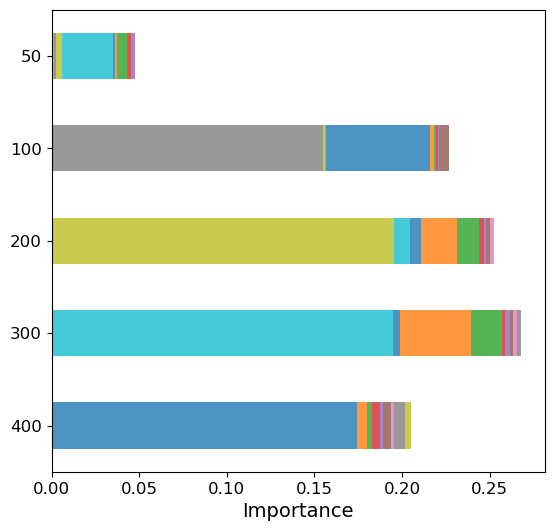

In [114]:
df1 = pd.DataFrame(columns=data475_1.columns[3:], index=eta_1)
df1.iloc[0, 0:9]      = feature_importance[0:9]       #400
df1.iloc[1, 9:18]     = feature_importance[9:18]      #300
df1.iloc[2, 18:27]    = feature_importance[18:27]     #200
df1.iloc[3, 27:36]    = feature_importance[27:36]     #100
df1.iloc[4, 36:45]    = feature_importance[36:45]     #50

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df1.plot(kind='barh', stacked=True, align='center', alpha=0.8, ax=ax1)
plt.xlabel('Importance', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.get_legend().remove()
df1.to_csv('/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_daoxu/importance_g1.csv')

In [112]:
imp = feature_importance.reshape(5, 9)
pd.DataFrame(imp)
eta = [400, 300, 200, 100, 50]
np.argmax(imp, axis=0)
res = [eta[e] for e in np.argmax(imp, axis=0)]
res

[200, 200, 300, 100, 200, 400, 50, 400, 100]

In [115]:
# /Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_shunxu


FileNotFoundError: [Errno 2] No such file or directory: '/Users/renzhe/Desktop/project2/g1/data/g1_1_dRs_model/5eta_50_400_shunxu/recal5.m'

[400, 200, 200, 200, 100, 100, 200, 300, 100]